In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
      return 1.0 / (1.0 + np.exp(-x))
def step(x):
      return x > 0

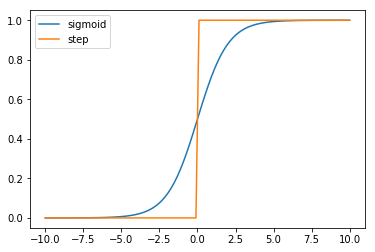

In [3]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.legend(['sigmoid', 'step'])

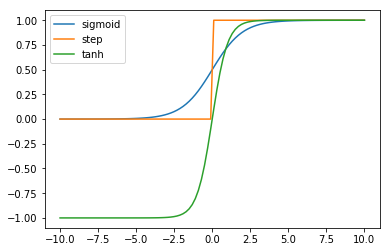

In [4]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.plot(x, np.tanh(x))
plt.legend(['sigmoid', 'step', 'tanh'])

In [5]:
def relu(x):
    cond = x > 0
    return cond * x

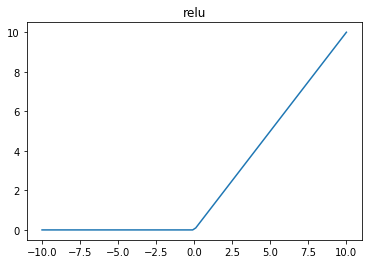

In [6]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.title('relu')

In [7]:
def softplus(x):
      return np.log1p(np.exp(x))

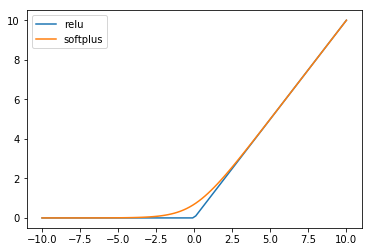

In [8]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, softplus(x))
plt.legend(['relu', 'softplus'])

In [9]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * np.where(x>0.0, x, alpha * (np.exp(x) - 1))

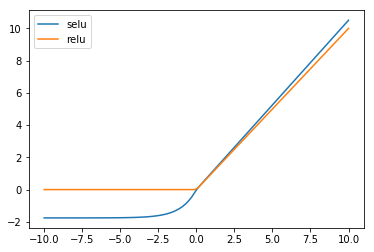

In [10]:
x = np.linspace(-10, 10, 100)
plt.plot(x, selu(x))
plt.plot(x, relu(x))
plt.legend(['selu', 'relu'])

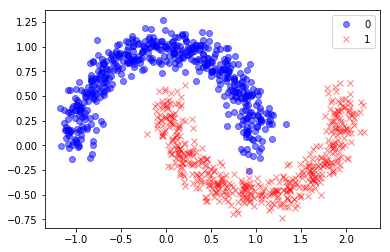

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [12]:
X.shape

(1000, 2)

In [15]:
X

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ..., 
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train

array([[ 1.76205245, -0.14570237],
       [ 0.55588423, -0.48846328],
       [-0.78700509,  0.29237568],
       ..., 
       [ 0.87494615,  0.47891825],
       [ 0.02224454,  1.03198998],
       [ 0.66971953,  0.40652933]])

In [18]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0,

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [20]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=0)

In [21]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 54us/step


In [22]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


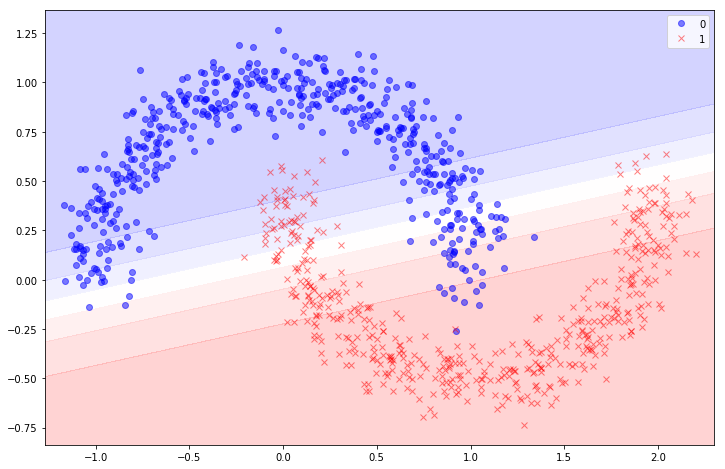

In [23]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
plot_decision_boundary(model, X, y)

In [24]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

300/300 [==============================] - 0s 22us/step
The Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.983


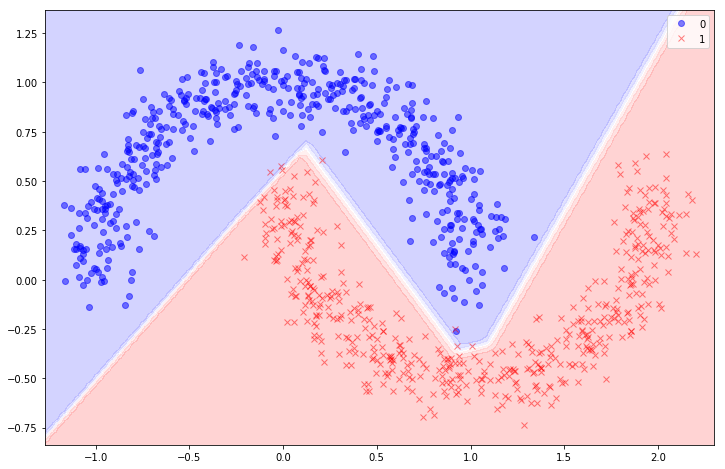

In [28]:
plot_decision_boundary(model, X, y)

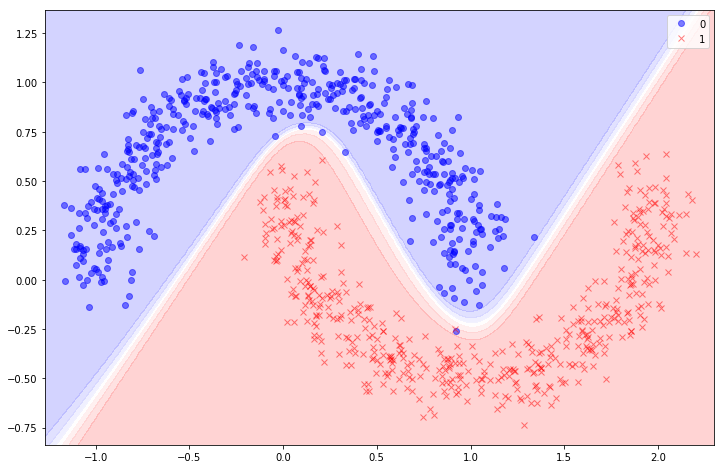

In [29]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

plot_decision_boundary(model, X, y)

In [30]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

300/300 [==============================] - 0s 21us/step
The Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	1.000


In [31]:
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [35]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [36]:
from keras.utils import to_categorical
y_cat = to_categorical(y)
y_cat[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,test_size=0.2, random_state=0, stratify=y)

In [38]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Train on 108 samples, validate on 12 samples
Epoch 1/30
108/108 [==============================] - 0s 831us/step - loss: 2.0796 - acc: 0.2778 - val_loss: 1.6625 - val_acc: 0.2500
Epoch 2/30
108/108 [==============================] - 0s 78us/step - loss: 1.5327 - acc: 0.3241 - val_loss: 0.9328 - val_acc: 0.2500
Epoch 3/30
108/108 [==============================] - 0s 87us/step - loss: 0.8309 - acc: 0.4907 - val_loss: 0.6093 - val_acc: 0.7500
Epoch 4/30
108/108 [==============================] - 0s 64us/step - loss: 0.7323 - acc: 0.6481 - val_loss: 0.7357 - val_acc: 0.5833
Epoch 5/30
108/108 [==============================] - 0s 70us/step - loss: 0.6219 - acc: 0.6389 - val_loss: 0.6353 - val_acc: 0.5833
Epoch 6/30
108/108 [==============================] - 0s 72us/step - loss: 0.4924 - acc: 0.7593 - val_loss: 0.4664 - val_acc: 0.8333
Epoch 7/30
108/108 [==============================] - 0s 81us/step - loss: 0.5015 - acc: 0.6852 - val_loss: 0.5013 - val_acc: 0.7500
Epoch 8/30
108/108 [===

In [40]:
y_pred = model.predict(X_test)
y_pred

array([[  9.83184040e-01,   1.68141127e-02,   1.91878007e-06],
       [  1.48224700e-02,   7.49741316e-01,   2.35436261e-01],
       [  9.56215501e-01,   4.37699482e-02,   1.45541953e-05],
       [  9.53270122e-04,   3.77138913e-01,   6.21907890e-01],
       [  9.69795525e-01,   3.01983226e-02,   6.14066357e-06],
       [  1.44688245e-02,   7.55127430e-01,   2.30403781e-01],
       [  8.31661629e-04,   2.55523115e-01,   7.43645191e-01],
       [  9.58882153e-01,   4.11050320e-02,   1.27794738e-05],
       [  9.44939852e-01,   5.50380088e-02,   2.21734117e-05],
       [  5.23622707e-02,   8.62293363e-01,   8.53443965e-02],
       [  1.34364018e-04,   9.41427872e-02,   9.05722916e-01],
       [  3.99384126e-02,   8.30446959e-01,   1.29614621e-01],
       [  1.06549356e-02,   6.92188621e-01,   2.97156483e-01],
       [  5.87099174e-04,   2.21742168e-01,   7.77670741e-01],
       [  4.97953966e-02,   8.73480678e-01,   7.67238662e-02],
       [  4.38353134e-04,   1.92023620e-01,   8.0753803

In [41]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30



In [43]:
cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm, index = target_names, columns = ['pred_'+c for c in target_names])

,pred_setosa,pred_versicolor,pred_virginica
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


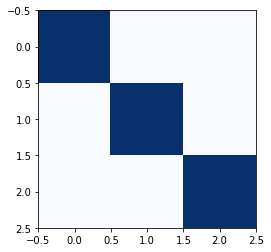

In [44]:
plt.imshow(cm, cmap='Blues')

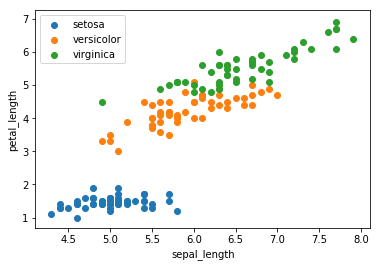

In [45]:
plt.scatter(X.loc[y==0,'sepal_length'], X.loc[y==0,'petal_length'])
plt.scatter(X.loc[y==1,'sepal_length'], X.loc[y==1,'petal_length'])
plt.scatter(X.loc[y==2,'sepal_length'], X.loc[y==2,'petal_length'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(target_names)

In [46]:
import seaborn as sns

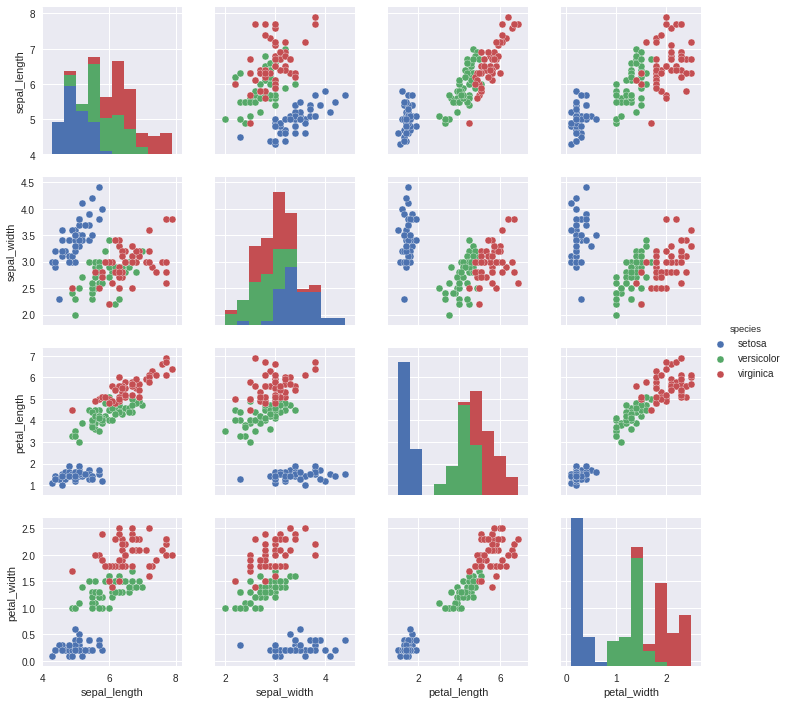

In [47]:
sns.pairplot(df, hue="species")